## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
target = boston_dataset["target"]

In [6]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
boston.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


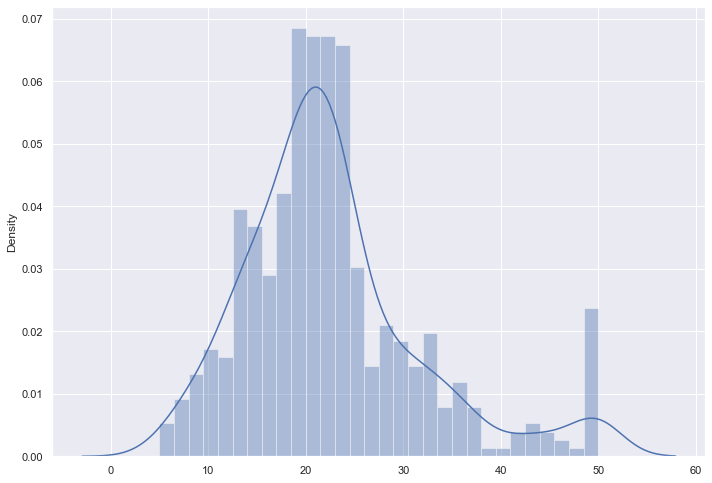

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(target, bins=30)
plt.show()

<AxesSubplot:>

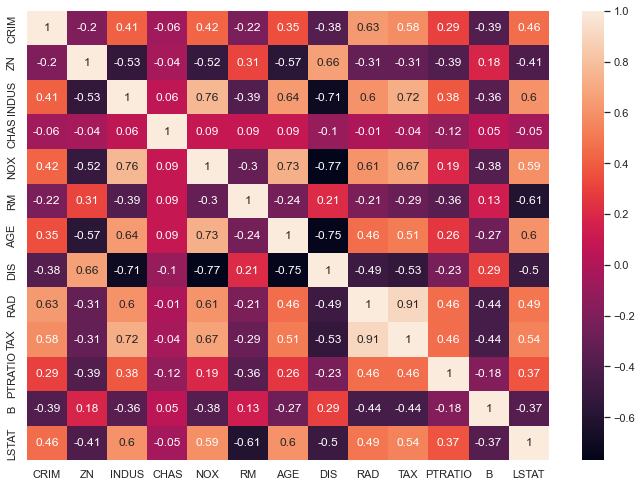

In [9]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

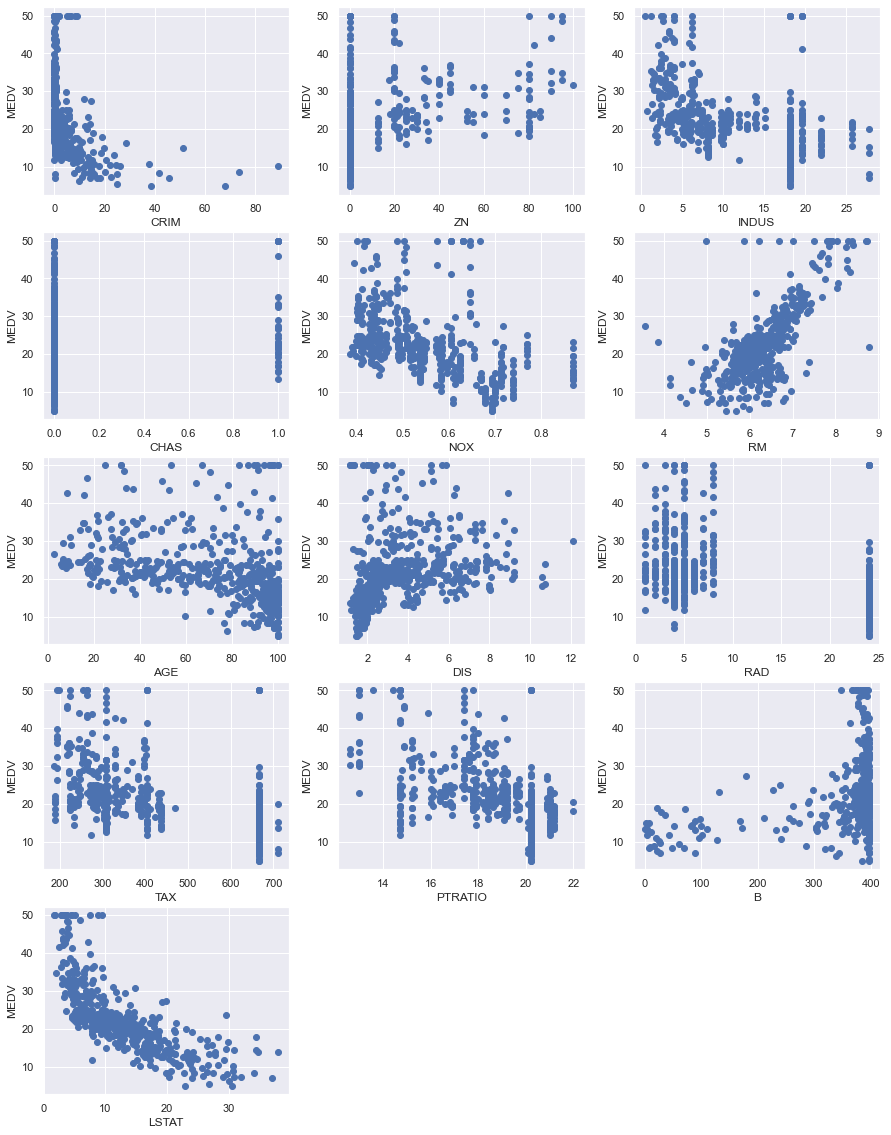

In [10]:
plt.figure(figsize=(15, 20))

features = boston.keys()

for i, col in enumerate(features):
    plt.subplot(5, 3, i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    # plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [11]:
scaler_data = MinMaxScaler()
train_data = scaler_data.fit_transform(boston)
train_data = pd.DataFrame(train_data, columns=boston_dataset["feature_names"])
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [13]:
neurons = [50, 100, 200]
optimizers =  ['SGD','RMSProp','adam','NAdam']
metrics = ['MSE', 'MAE']

In [14]:
colNames = ["neurons", "epochs", "optimizer", "metric",
            "loss (train)", "metric_val (train)", "rmse (train)", "r2 (train)",
            "loss (test)", "metric_val (test)", "rmse (test)", "r2 (test)" ]

Построим модели с тремя слоями

In [15]:
model_3_layers = pd.DataFrame(columns=colNames)

k = 1000
for i in neurons:
    for i_optim in optimizers:
        for k_metric in metrics:
            x_input = keras.layers.Input( shape=(13))
            x = keras.layers.Dense(i, activation='relu')(x_input)
            x_output = keras.layers.Dense(1)(x)
            model = keras.models.Model(inputs=x_input, outputs=x_output)

            model.compile(
                optimizer=i_optim,
                loss='mae',
                metrics=[k_metric])

            model.fit(
                X_train,
                y_train,
                epochs=k,
                batch_size=100,
                validation_split=0.2,
                verbose=0
            )
            
            loss_metric_train = model.evaluate(X_train, y_train)
            
            y_train_predict = model.predict(X_train)
            rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
            r2_train = r2_score(y_train, y_train_predict)

            loss_metric_test = model.evaluate(X_test, y_test)
            
            y_test_predict = model.predict(X_test)
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
            r2_test = r2_score(y_test, y_test_predict)
            
            model_3_layers = model_3_layers.append(pd.DataFrame({
                'neurons': [i],
                'epochs': [k],
                'optimizer': i_optim,
                'metric': k_metric,

                'loss (train)': [loss_metric_train[0]],
                'metric_val (train)': [loss_metric_train[1]],
                'rmse (train)': [rmse_train],
                'r2 (train)': [r2_train],

                'loss (test)': [loss_metric_test[0]],
                'metric_val (test)': [loss_metric_test[1]],
                'rmse (test)': [rmse_test],
                'r2 (test)': [r2_test]}),
                ignore_index=True)  

2022-05-31 15:07:59.232870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 995us/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 991us/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 989us/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 955us/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 976us/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 963us/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2390735276.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_3_layers = model_3_layers.append(pd.DataFrame({


Построим теперь модель с 5 слоями

In [16]:
model_5_layers = pd.DataFrame(columns=colNames)

k = 1000
for i in neurons: 
    for i_optim in optimizers:
        for k_metric in metrics:
            x_input = keras.layers.Input( shape=(13))
            x = keras.layers.Dense(i, activation='relu')(x_input)
            x_1 = keras.layers.Dense(i, activation='relu')(x)
            x_2 = keras.layers.Dense(i, activation='relu')(x_1)
            x_output = keras.layers.Dense(1)(x_2)
            model = keras.models.Model(inputs=x_input, outputs=x_output)

            model.compile(
                optimizer=i_optim,
                loss='mae',
                metrics=[k_metric])

            model.fit(
                X_train,
                y_train,
                epochs=k,
                batch_size=100,
                validation_split=0.2,
                verbose=0
            )
            
            loss_metric_train = model.evaluate(X_train, y_train)
            
            y_train_predict = model.predict(X_train)
            rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
            r2_train = r2_score(y_train, y_train_predict)

            loss_metric_test = model.evaluate(X_test, y_test)
            
            y_test_predict = model.predict(X_test)
            rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
            r2_test = r2_score(y_test, y_test_predict)
            
            model_5_layers = model_5_layers.append(pd.DataFrame({
                'neurons': [i],
                'epochs': [k],
                'optimizer': i_optim,
                'metric': k_metric,

                'loss (train)': [loss_metric_train[0]],
                'metric_val (train)': [loss_metric_train[1]],
                'rmse (train)': [rmse_train],
                'r2 (train)': [r2_train],

                'loss (test)': [loss_metric_test[0]],
                'metric_val (test)': [loss_metric_test[1]],
                'rmse (test)': [rmse_test],
                'r2 (test)': [r2_test]}),
                ignore_index=True)

4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 2ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


4/4 [==============================] - 0s 1ms/step


/var/folders/tw/jpryffr53r5_9z9t7wz7rbv80000gn/T/ipykernel_23994/2971381929.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_5_layers = model_5_layers.append(pd.DataFrame({


In [17]:
model_3_layers.sort_values(by='r2 (test)', ascending=False).head(1)

,neurons,epochs,optimizer,metric,loss (train),metric_val (train),rmse (train),r2 (train),loss (test),metric_val (test),rmse (test),r2 (test)
18,200,1000,RMSProp,MSE,2.699732,19.916763,4.46282,0.772528,2.730861,13.718363,3.703831,0.816774


In [18]:
model_5_layers.sort_values(by='r2 (test)', ascending=False).head(1)

,neurons,epochs,optimizer,metric,loss (train),metric_val (train),rmse (train),r2 (train),loss (test),metric_val (test),rmse (test),r2 (test)
22,200,1000,NAdam,MSE,1.50183,4.862529,2.205114,0.944464,2.093678,7.968777,2.822902,0.893567


Можем видеть, что увеличение слоев позволило улучшить метрику на тесте с 0.816774 до 0.893567. Можно сделать вывод, что все параметры влияют на конечный результат, но ключевыми являются количество слоев и нейронов, в зависимости от которых уже подбираются остальные параметры